<a href="https://colab.research.google.com/github/eduardoferreira97/Pratica_Filtros/blob/main/Aula_Pr%C3%A1tica_de_Filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade 1**

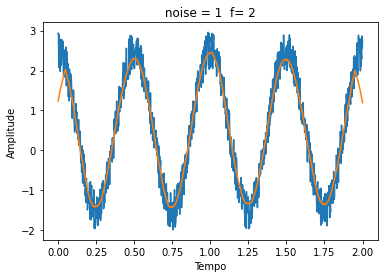

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import random

# Geração do sinal descrito
mag_noise = 1 # Nível de ruído
f = 2 # frequência do sinal

# Gerando sinal
t = np.linspace(0,2,1000) # 1000 pontos entre 0 e 2
x= 2*np.cos(2*np.pi*f*t)

# Adicionando Ruído
k = 0
while k < len(x):
    x[k]=x[k]+ mag_noise*random.uniform(0,1)
    k = k +1


# DESENVOLVIMENTO DO FILTRO
filtered = signal.convolve(x, (np.ones(50))/50)

# Plotando o Gráfico 
plt.title(f" noise = {mag_noise}  f= {f} ")
plt.ylabel("Amplitude")
plt.xlabel("Tempo")
plt.plot(t,x)
plt.plot(t, filtered[25:-24])
plt.show()

# **Atividade 2**

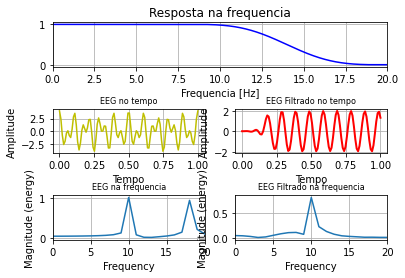

In [ ]:
import numpy as np
from scipy import signal
from matplotlib import mlab
import matplotlib.pyplot as plt

# Geração do sinal descrito
freq_alfa = 10 # frequência do sinal alfa
freq_beta = 18 # frequência do sinal beta

# valores de calculo
freq_corte = 14 # frequencia de corte
sample = 100 # frequncia de amostragem

# Gerando o sinal
t = np.linspace(0, 1, sample)
alfa = 2*np.cos(2*np.pi*freq_alfa*t)
beta = 2*np.cos(2*np.pi*freq_beta*t)
eeg = alfa + beta

# criando o passa baixo FIR
nyq_rate = sample / 2.0
width = 10.0 / nyq_rate
ripple_db = 60.0
N, beta = signal.kaiserord(ripple_db, width)
filtro = signal.firwin(N, freq_corte/nyq_rate, window=('kaiser', beta))
filtrado = signal.lfilter(filtro, 1.0, eeg)

# Calculando a resposta de frequencia
w, h = signal.freqz(filtro, 1.0, fs=sample, worN=8000)

# Plotando o gráfico 
plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.xlim(0, 20)
plt.title("Resposta na frequencia")
plt.xlabel('Frequencia [Hz]')
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(t, eeg, 'y-')
plt.title("EEG no tempo", fontdict={"size": 8})
plt.ylabel("Amplitude")
plt.xlabel("Tempo")
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(t, filtrado, 'r-', linewidth=2)
plt.title("EEG Filtrado no tempo", fontdict={"size": 8})
plt.ylabel("Amplitude")
plt.xlabel("Tempo")
plt.grid()

plt.subplot(3, 2, 5)
plt.xlim(0, 20)
plt.magnitude_spectrum(eeg, Fs=sample, window=mlab.window_none)
plt.title("EEG na frequencia", fontdict={"size": 8})
plt.grid()

plt.subplot(3, 2, 6)
plt.xlim(0, 20)
plt.magnitude_spectrum(filtrado, Fs=sample, window=mlab.window_none)
plt.title("EEG Filtrado na frequencia", fontdict={"size": 8})
plt.grid()

plt.subplots_adjust(hspace=0.95)
plt.show()

# **Atividade 3**

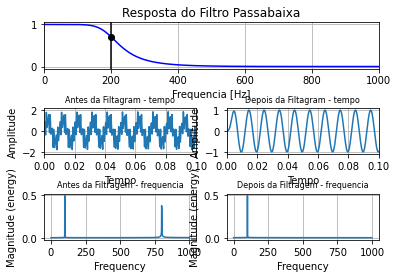

In [ ]:
import numpy as np
from scipy import signal
from matplotlib import mlab
import matplotlib.pyplot as plt

# valores de calculo
cutoff = 200 # frequencia de corte
sample = 2000 # frequncia de amostragem
order = 4 # ordem do FIR

# Gerando o sinal
t = np.linspace(0, 1, sample)
entrada = np.sin(2*np.pi*100*t) + np.sin(2*np.pi*800*t)

# criando o passa baixo FIR
b, a = signal.butter(order, cutoff, fs=sample, btype="low", analog=False)
filtrado = signal.lfilter(b, a, entrada)

# Calculando a resposta de frequencia
w, h = signal.freqz(b, a, fs=sample, worN=8000)

# Plotando o gráfico 
plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 1000)
plt.title("Resposta do Filtro Passabaixa")
plt.xlabel('Frequencia [Hz]')
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(t, entrada)
plt.xlim(0, 0.1)
plt.title("Antes da Filtagram - tempo", fontdict={"size": 8})
plt.ylabel("Amplitude")
plt.xlabel("Tempo")
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(t, filtrado)
plt.xlim(0, 0.1)
plt.title("Depois da Filtagram - tempo", fontdict={"size": 8})
plt.ylabel("Amplitude")
plt.xlabel("Tempo")
plt.grid()

plt.subplot(3, 2, 5)
plt.magnitude_spectrum(entrada, Fs=sample, window=mlab.window_none)
plt.title("Antes da Filtragem - frequencia", fontdict={"size": 8})
plt.grid()

plt.subplot(3, 2, 6)
plt.magnitude_spectrum(filtrado, Fs=sample, window=mlab.window_none)
plt.title("Depois da Filtragem - frequencia", fontdict={"size": 8})
plt.grid()

plt.subplots_adjust(hspace=0.85)
plt.show()

# **Atividade 4**



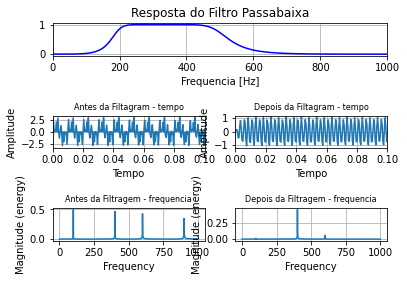

In [ ]:
import numpy as np
from scipy import signal
from matplotlib import mlab
import matplotlib.pyplot as plt

# valores de calculo
bpass = [0.3*np.pi*200, 0.8*np.pi*200] # banda de passagem
sample = 2000 # frequncia de amostragem
order = 4 # ordem do FIR

# Gerando o sinal
t = np.linspace(0, 1, sample)
entrada = np.sin(2*np.pi*100*t) + np.sin(2*np.pi*400*t) + np.sin(2*np.pi*600*t)+np.sin(2*np.pi*900*t)

# criando o passa baixo FIR
b, a = signal.butter(order, bpass, fs=sample, btype="bandpass", analog=False)
filtrado = signal.lfilter(b, a, entrada)

# Calculando a resposta de frequencia
w, h = signal.freqz(b, a, fs=sample)

# Plotando o gráfico 
plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.xlim(0, 1000)
plt.title("Resposta do Filtro Passabaixa")
plt.xlabel('Frequencia [Hz]')
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(t, entrada)
plt.xlim(0, 0.1)
plt.title("Antes da Filtagram - tempo", fontdict={"size": 8})
plt.ylabel("Amplitude")
plt.xlabel("Tempo")
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(t, filtrado)
plt.xlim(0, 0.1)
plt.title("Depois da Filtagram - tempo", fontdict={"size": 8})
plt.ylabel("Amplitude")
plt.xlabel("Tempo")
plt.grid()

plt.subplot(3, 2, 5)
plt.magnitude_spectrum(entrada, Fs=sample, window=mlab.window_none)
plt.title("Antes da Filtragem - frequencia", fontdict={"size": 8})
plt.grid()

plt.subplot(3, 2, 6)
plt.magnitude_spectrum(filtrado, Fs=sample, window=mlab.window_none)
plt.title("Depois da Filtragem - frequencia", fontdict={"size": 8})
plt.grid()

plt.subplots_adjust(hspace=1.85)
plt.show()